In [4]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os


# Any results you write to the current directory are saved as output.
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Load the dataset with proper delimiter and column names
data = pd.read_csv(r'C:\Users\hp\Desktop\Machine Learning\Projects\4. Boston Housing Price\housing.csv', header=None, delimiter=r"\s+", names=column_names)

# Display the first 5 rows of the dataframe
print(data.head(5))


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [5]:
# Dimension of the dataset
print(np.shape(data))

(506, 14)


In [6]:
# Let's summarize the data to see the distribution of data
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

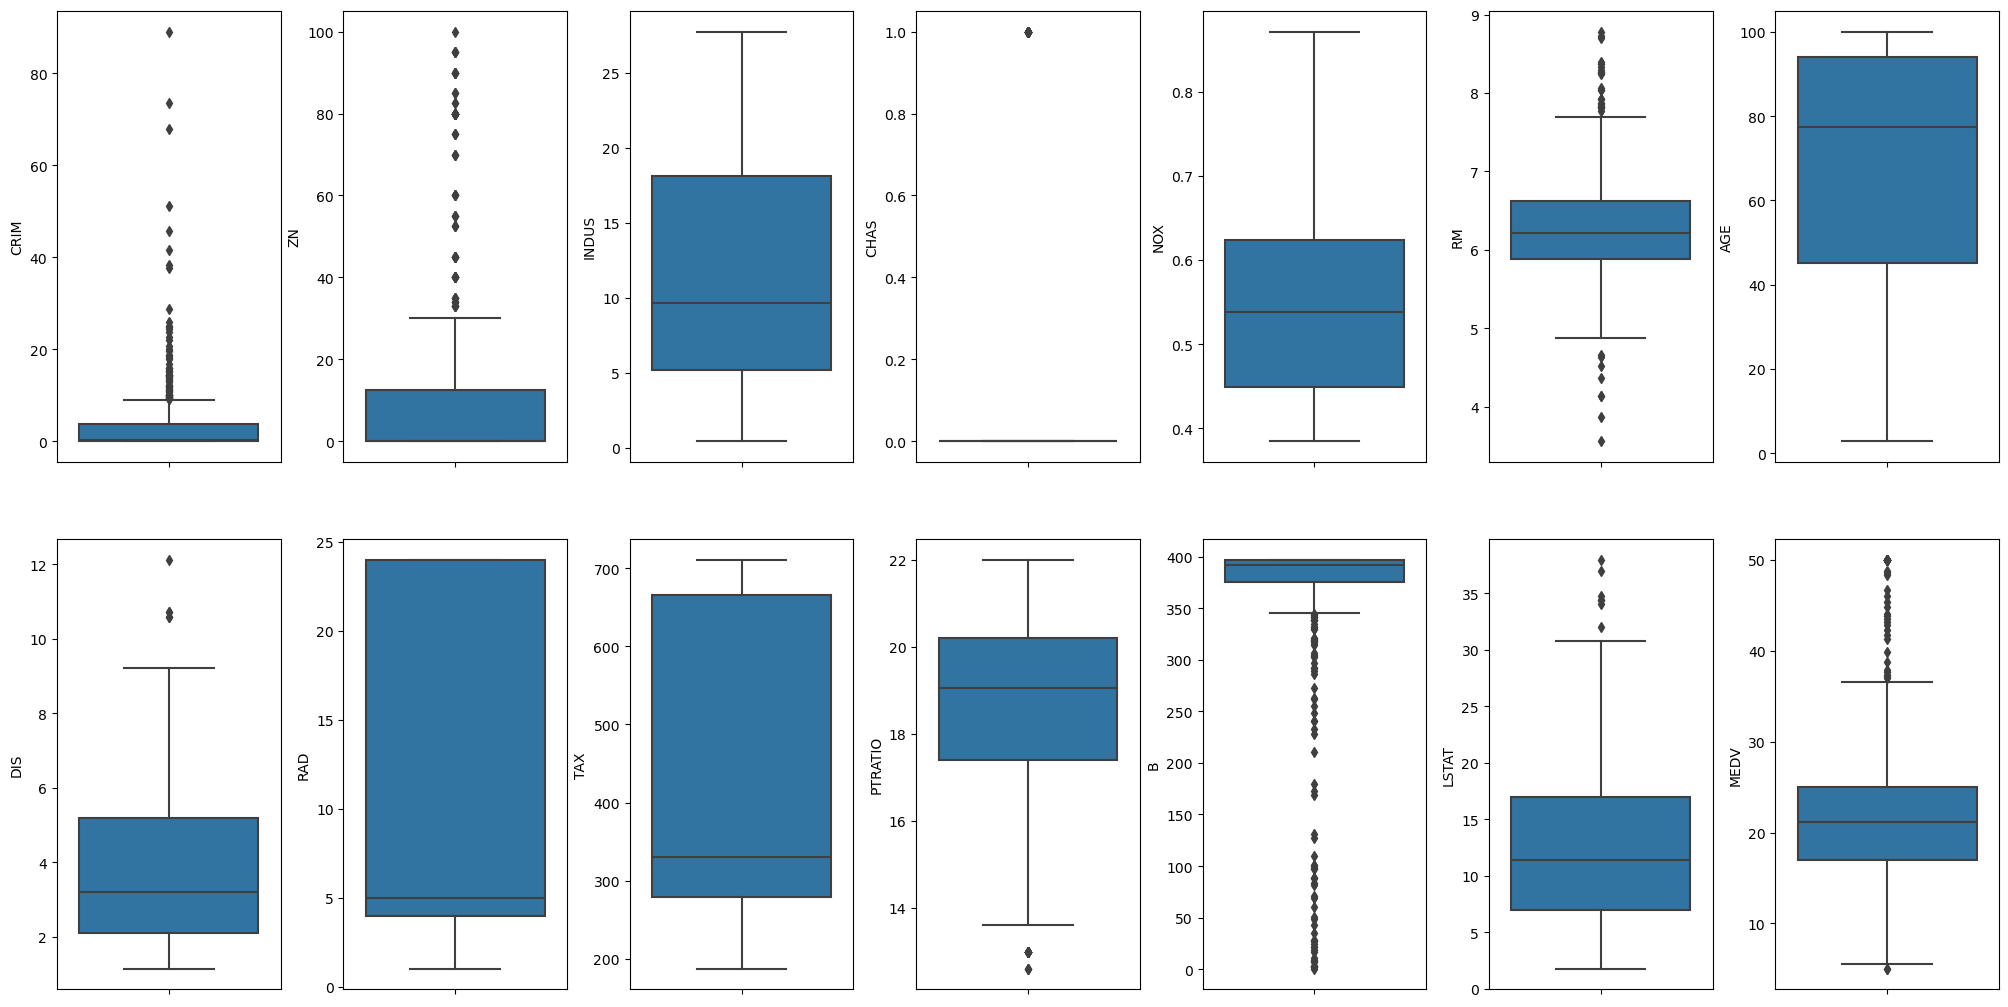

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [8]:
  for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))
    

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [9]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

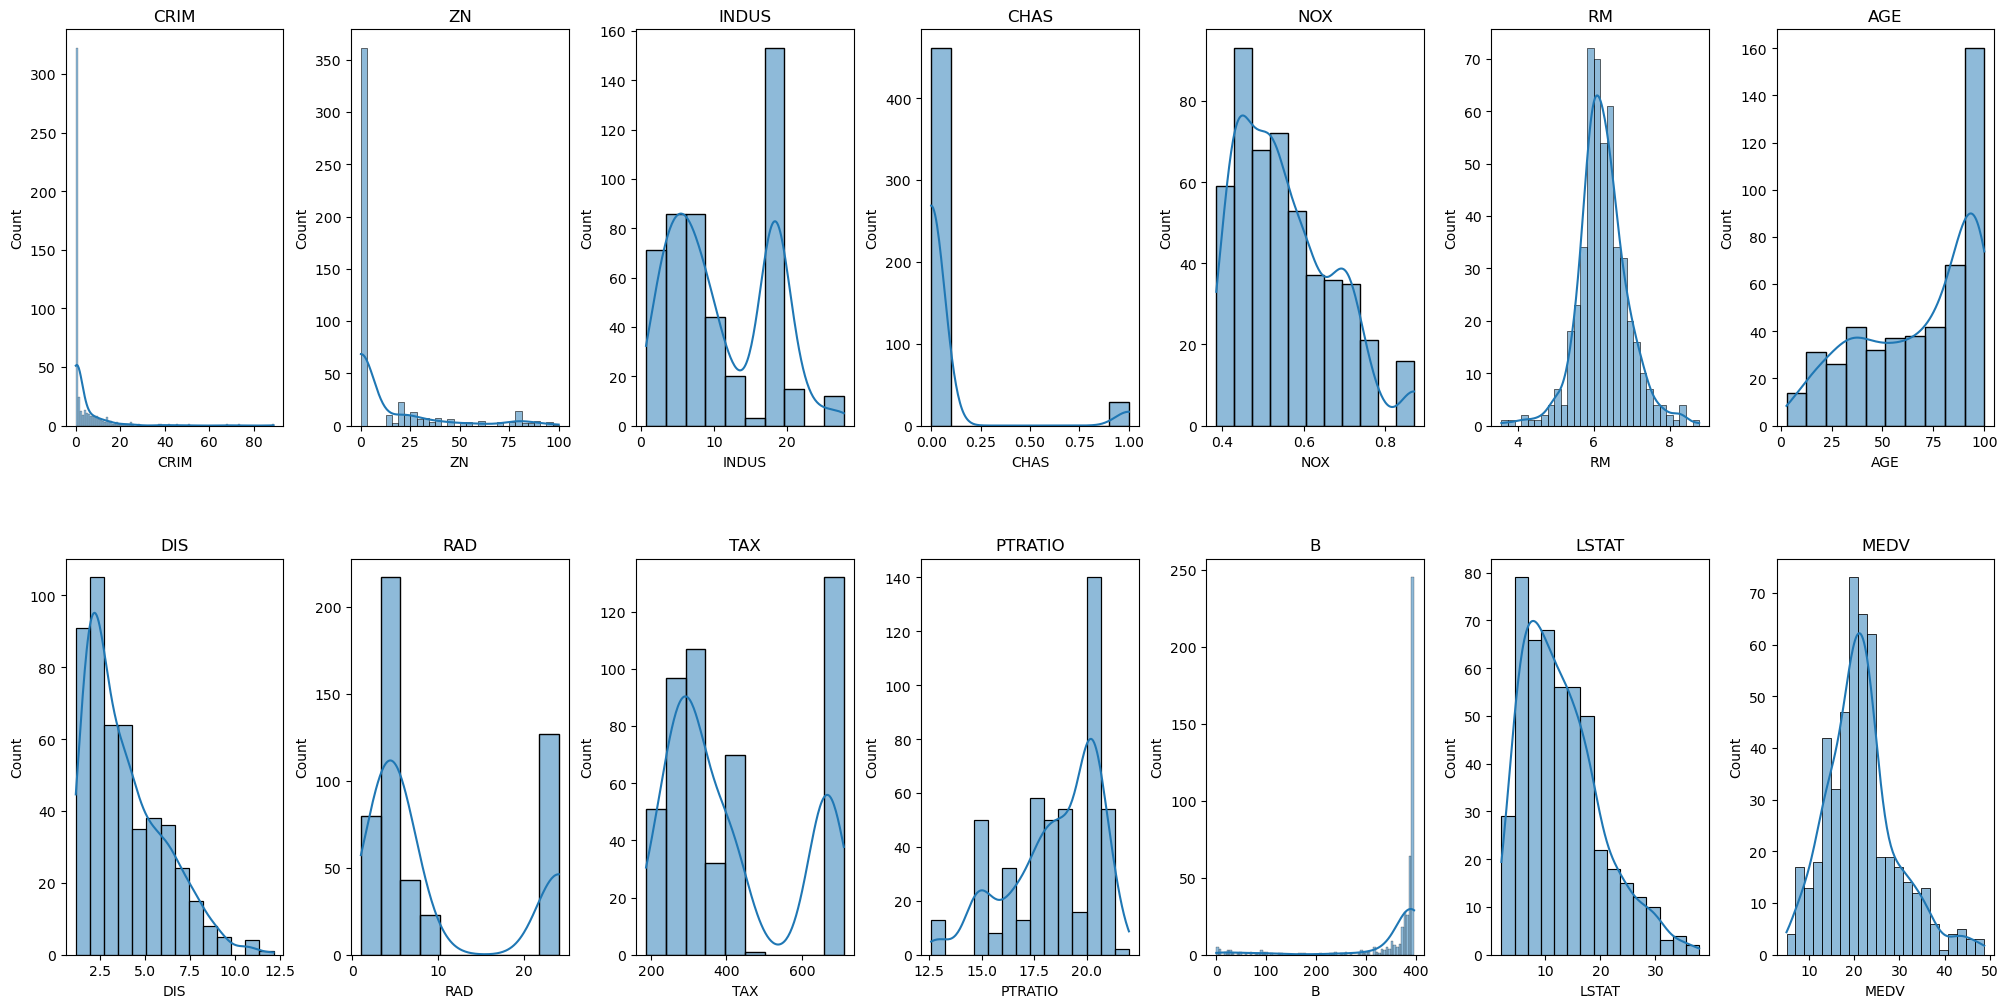

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))

# Flatten the axes array to make it easier to iterate through
axs = axs.flatten()

# Plot each column in the data using seaborn's distplot
for index, (k, v) in enumerate(data.items()):
    sns.histplot(v, ax=axs[index], kde=True)
    axs[index].set_title(k)  # Set the title of each subplot to the column name

# Adjust the layout of the plots
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


<Axes: >

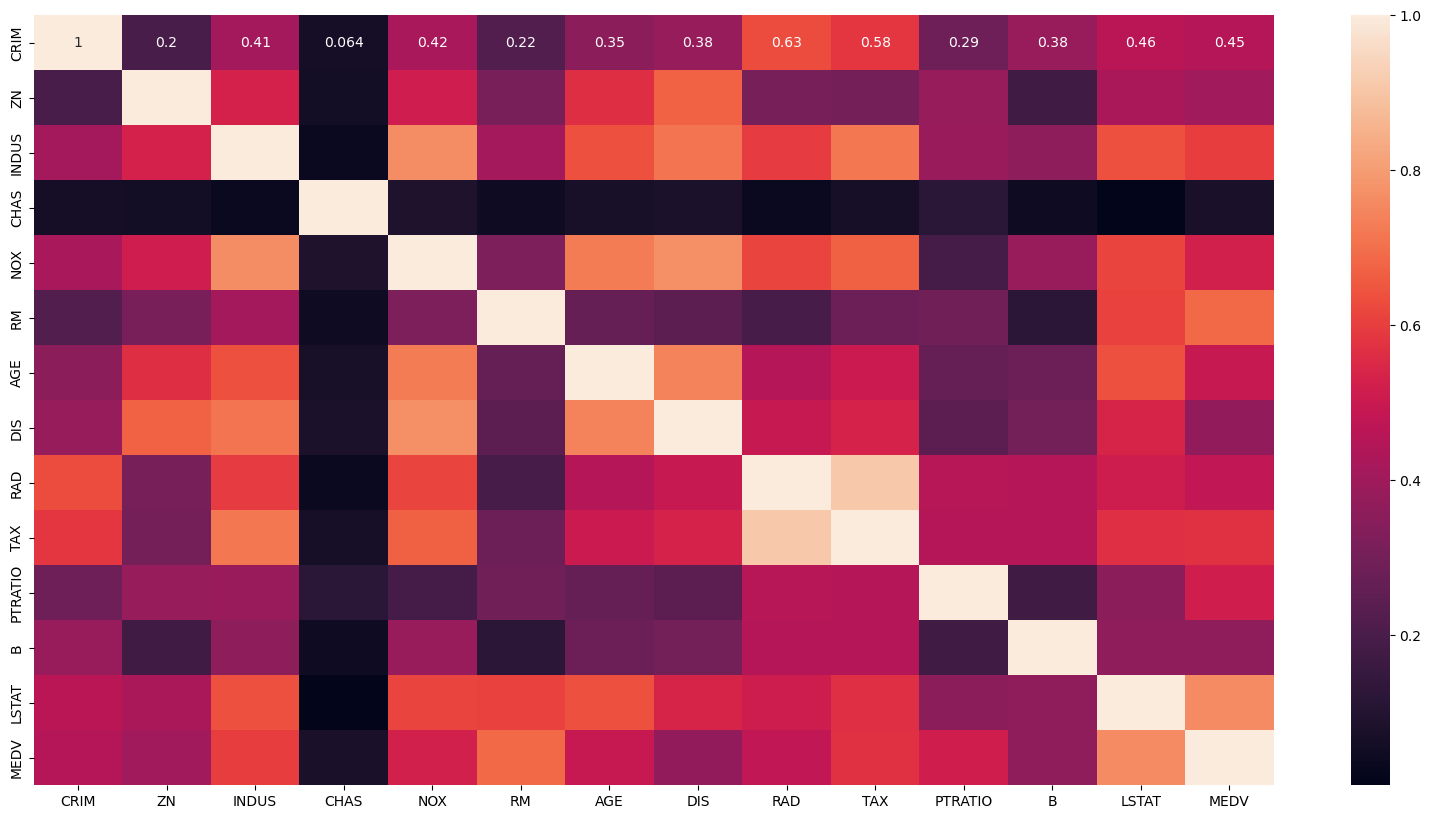

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

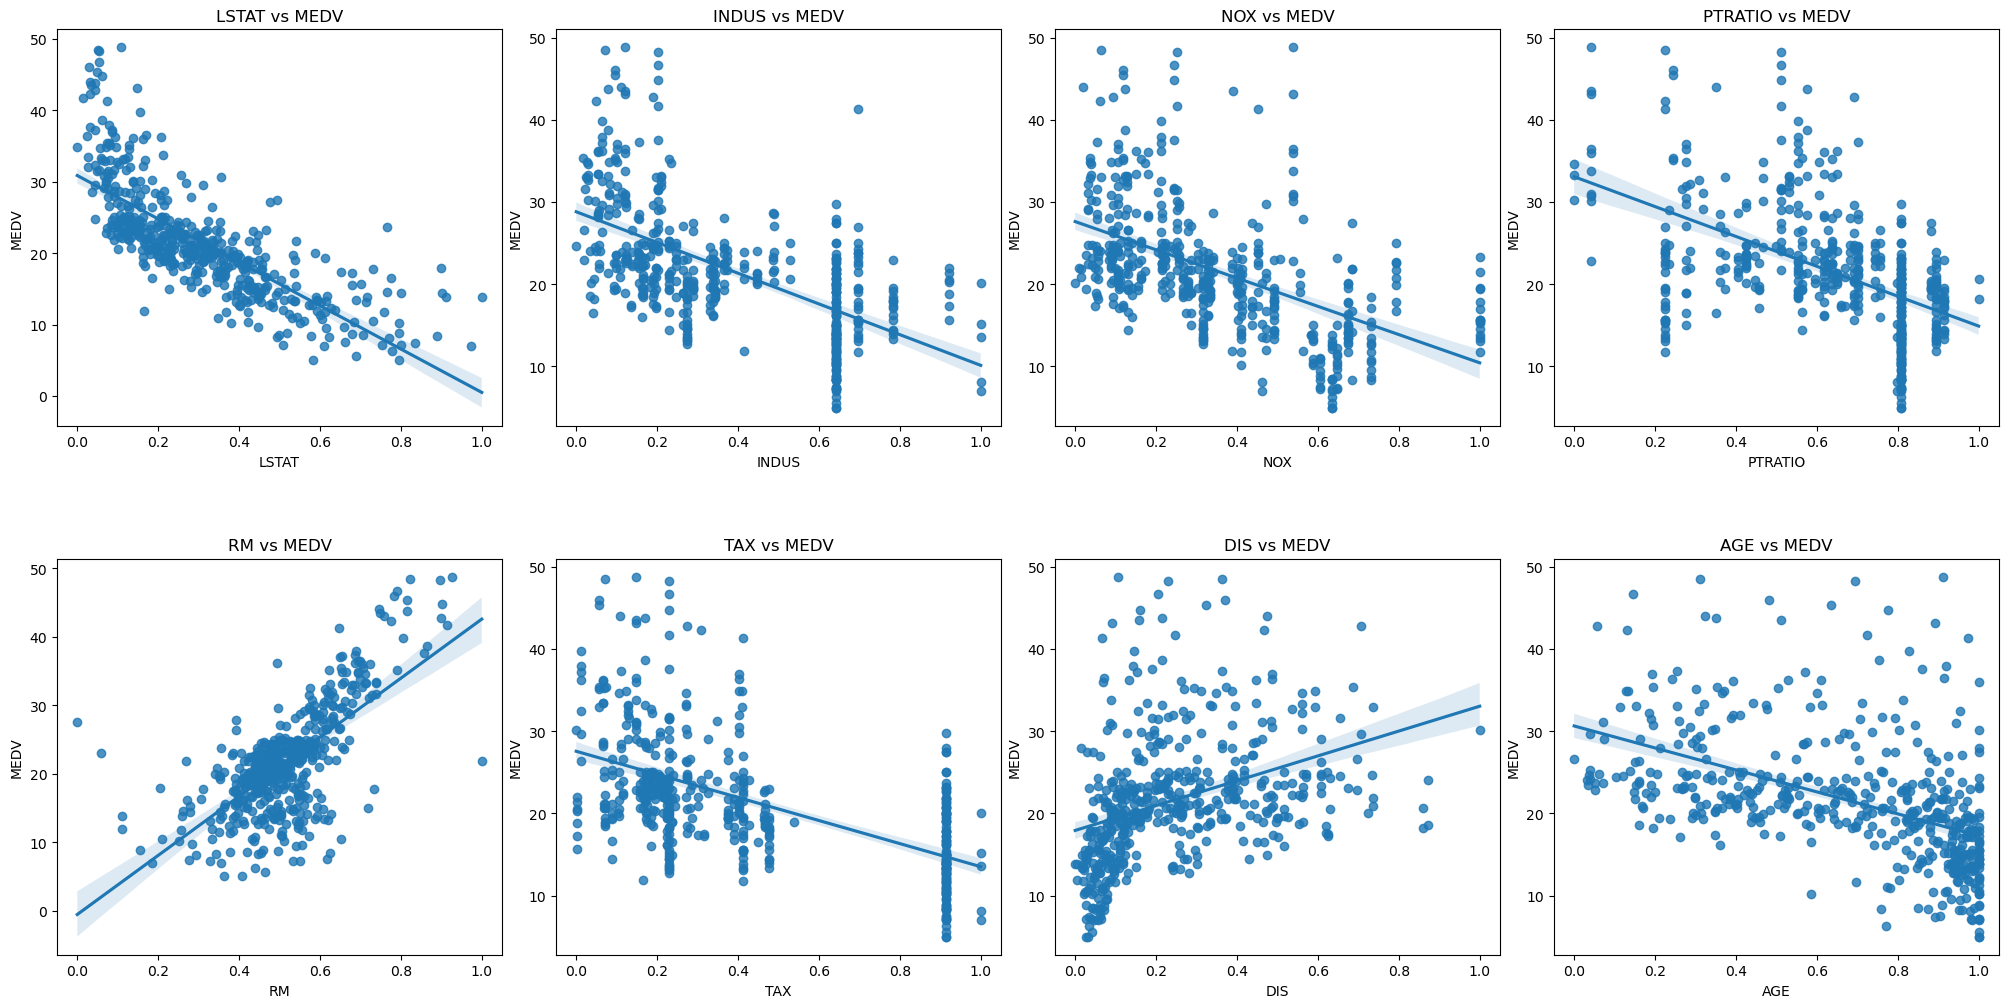

In [13]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define columns to be scaled and the target variable
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
target_col = 'MEDV'

# Extract the features and target variable
x = data.loc[:, column_sels]
y = data[target_col]

# Scale the selected columns using Min-Max Scaler
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = pd.DataFrame(min_max_scaler.fit_transform(x), columns=column_sels)

# Create subplots
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
axs = axs.flatten()

# Plot the scaled features against the target variable
for i, col in enumerate(column_sels):
    sns.regplot(x=x_scaled[col], y=y, ax=axs[i])
    axs[i].set_title(f'{col} vs {target_col}')

# Adjust layout for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()


In [14]:
import numpy as np
import pandas as pd

# Apply log transformation to the target variable to handle skewness
y = np.log1p(y)

# Apply log transformation to features with skewness greater than 0.3
for col in x.columns:
    skewness = x[col].skew()
    if np.abs(skewness) > 0.3:
        x[col] = np.log1p(x[col])


In [16]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

# Define the models
l_regression = linear_model.LinearRegression()
l_ridge = linear_model.Ridge()

# Prepare the data using MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

# Set up KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Dictionary to store scores for each model
scores_map = {}

# Cross-validation for Linear Regression
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("Linear Regression MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std()))
scores_map['LinearRegression'] = scores

# Cross-validation for Ridge Regression
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("Ridge Regression MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std()))
scores_map['Ridge'] = scores

# Cross-validation for Polynomial Ridge Regression with degree 3
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("Polynomial Ridge Regression (degree 3) MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std()))
scores_map['PolyRidge'] = scores


Linear Regression MSE: 0.03 (+/- 0.01)
Ridge Regression MSE: 0.03 (+/- 0.01)
Polynomial Ridge Regression (degree 3) MSE: 0.02 (+/- 0.01)


In [17]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define the SVR model with RBF kernel
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

# Set up KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Perform cross-validation for the SVR model
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Store and print the results
scores_map['SVR'] = scores
print("SVR MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std()))


SVR MSE: 0.02 (+/- 0.01)


In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold

# Define the Decision Tree Regressor model with a maximum depth of 5
desc_tr = DecisionTreeRegressor(max_depth=5)

# Set up KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Perform cross-validation for the Decision Tree Regressor model
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Store and print the results
scores_map['DecisionTreeRegressor'] = scores
print("Decision Tree Regressor MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std()))


Decision Tree Regressor MSE: 0.03 (+/- 0.01)


In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold

# Define the K-Nearest Neighbors Regressor model with 7 neighbors
knn = KNeighborsRegressor(n_neighbors=7)

# Set up KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Perform cross-validation for the KNN Regressor model
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')

# Store and print the results
scores_map['KNeighborsRegressor'] = scores
print("KNN MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std()))

KNN MSE: 0.03 (+/- 0.01)


In [20]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
#param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
#grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.02 (+/- 0.01)


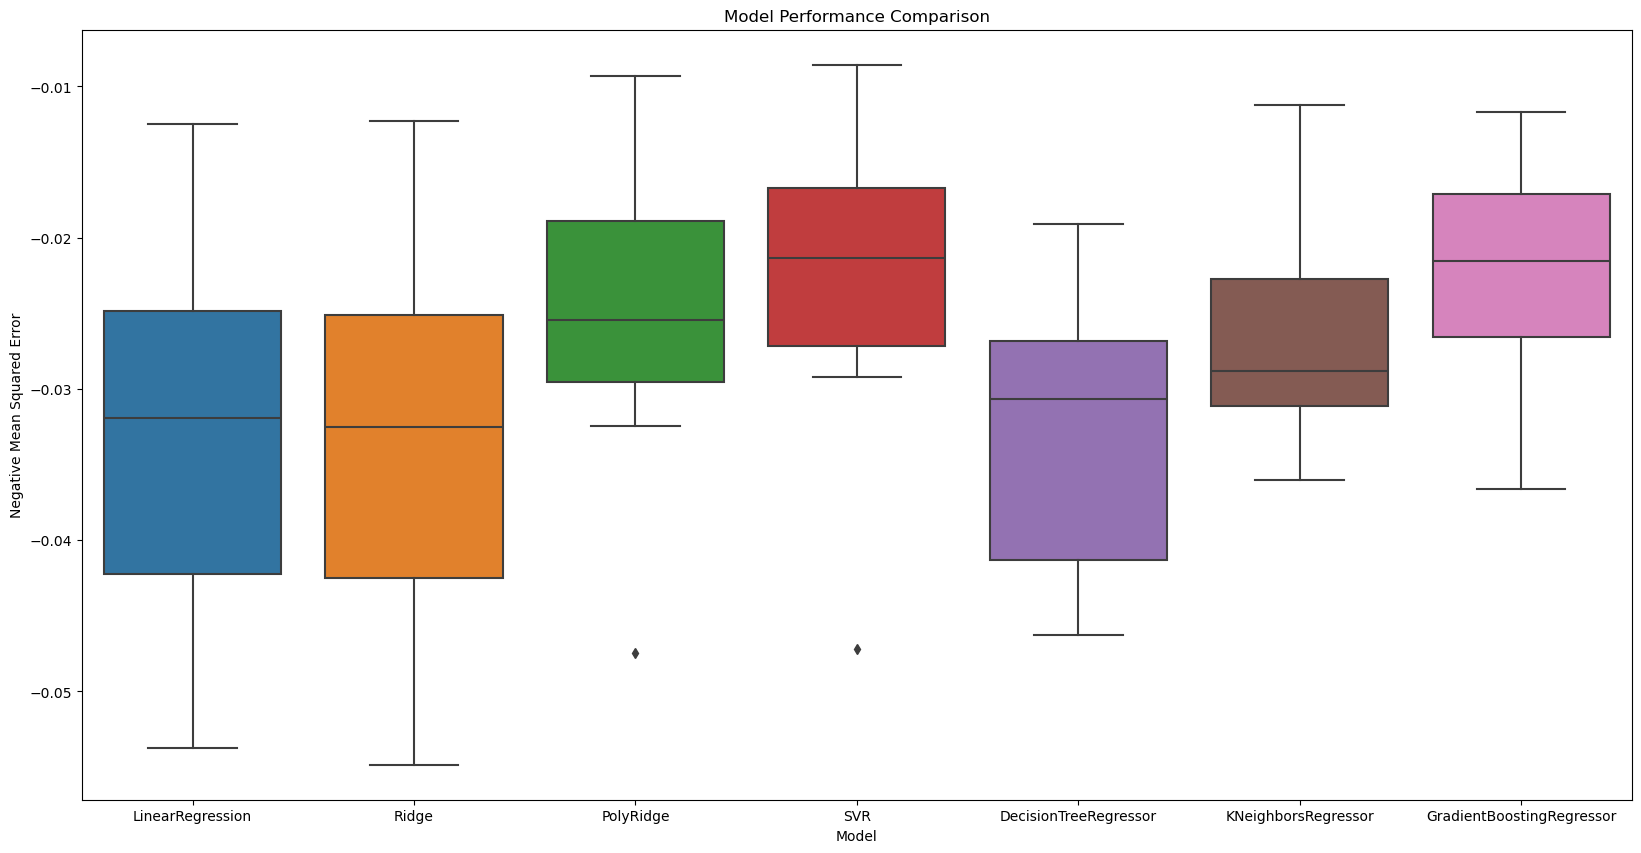

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a figure for the boxplot
plt.figure(figsize=(20, 10))

# Convert the scores_map dictionary to a DataFrame for easy plotting
scores_map_df = pd.DataFrame(scores_map)

# Create a boxplot of the cross-validation scores for each model
sns.boxplot(data=scores_map_df)

# Set plot labels and title
plt.xlabel('Model')
plt.ylabel('Negative Mean Squared Error')
plt.title('Model Performance Comparison')

# Show the plot
plt.show()